<a href="https://colab.research.google.com/github/KiranVarghese25/ml_labfiles/blob/main/Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [23]:
data=pd.read_csv('/content/spam (1).csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


(84, 3)

In [25]:
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])

data.head()
#1- spam and 0 - not spam


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


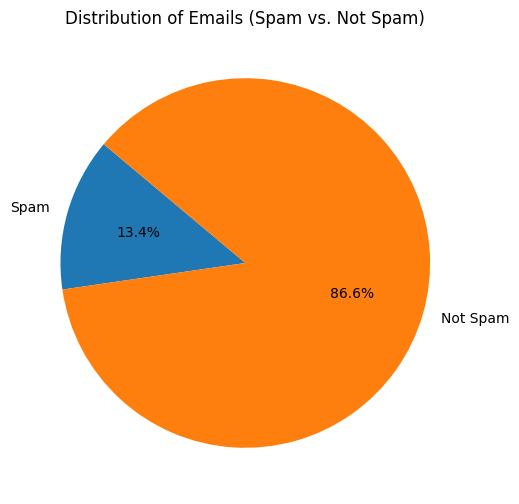

In [27]:
#Count of Spam and not spam
sp_count=(data['Category'] == 1).sum()
nsp_count=(data['Category'] == 0).sum()


labels = ['Spam', 'Not Spam']
counts = [sp_count, nsp_count]

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emails (Spam vs. Not Spam)')
plt.show()

In [31]:
X = data['Message']
y = data['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
alpha = 1.0
model = MultinomialNB(alpha=alpha)
model.fit(X_train_vect, y_train)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test_vect)

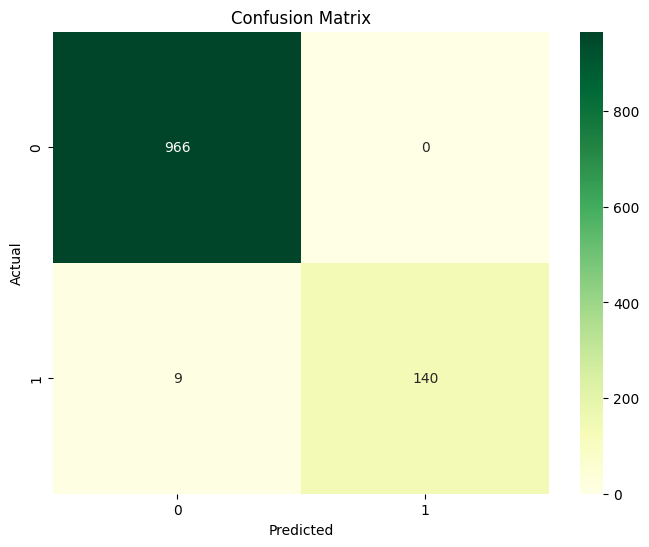

In [47]:
cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

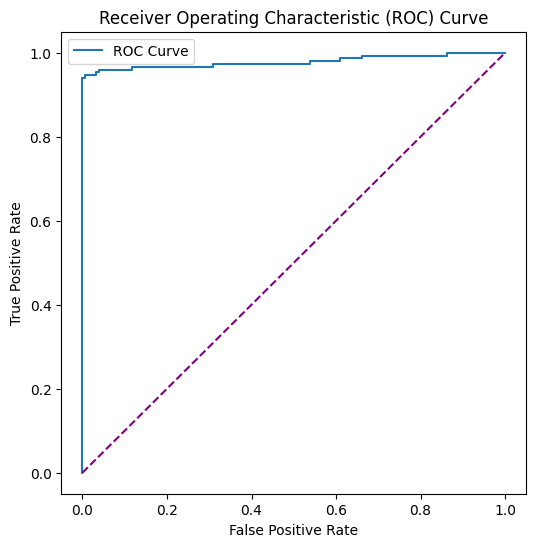

In [41]:
y_prob = model.predict_proba(X_test_vect)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

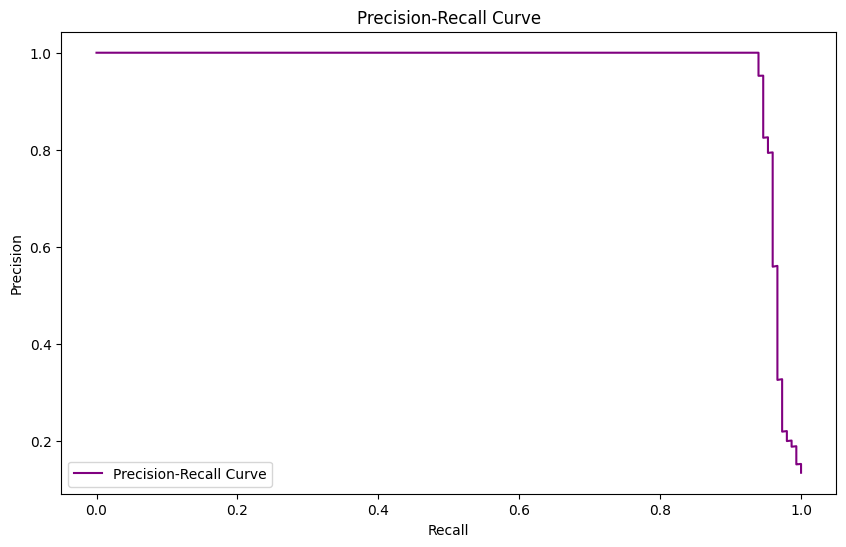

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve',color='Purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


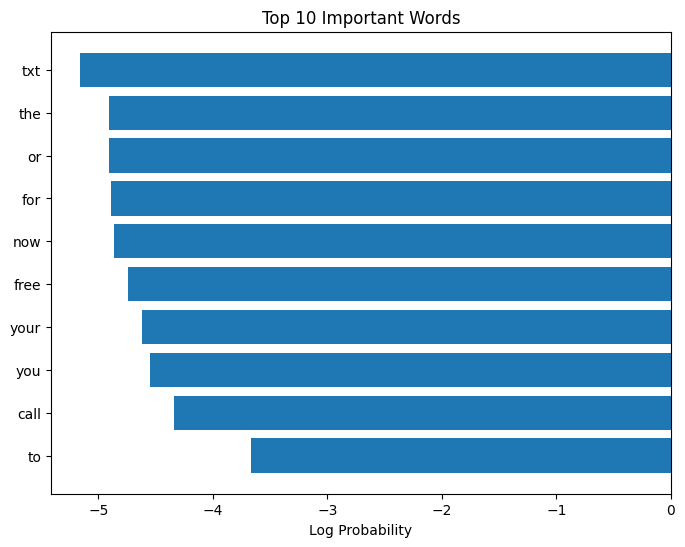

In [46]:
feature_names = vectorizer.get_feature_names_out()
feature_log_probabilities = model.feature_log_prob_[1]


sorted_indices = np.argsort(feature_log_probabilities)[::-1]
top_n = 10
top_features = [feature_names[i] for i in sorted_indices[:top_n]]
top_probabilities = [feature_log_probabilities[i] for i in sorted_indices[:top_n]]


plt.figure(figsize=(8, 6))
plt.barh(top_features, top_probabilities)
plt.xlabel('Log Probability')
plt.title('Top 10 Important Words')
plt.show()



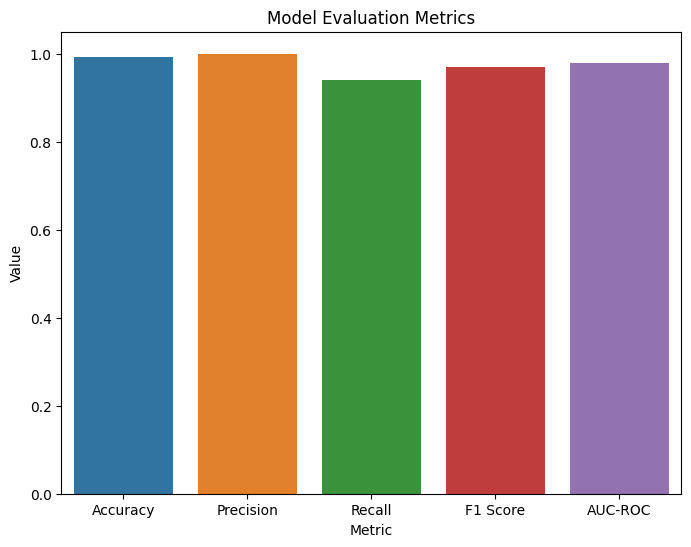

In [51]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)
metrics = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],'Value': [accuracy, precision, recall, f1, auc_roc]})

plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Value', data=metrics)
plt.title('Model Evaluation Metrics')
plt.show()
